## 1. Data preparation and exploration (35%)

### 1.1 Creating Spark Session (4%)

In [1]:
# Import SparkConf class into program
from pyspark import SparkConf

# local[*]: run Spark in local mode with as many working processors as logical cores on your machine
# If we want Spark to run locally with 'k' worker threads, we can specify as "local[k]".
master = "local[*]"

# The `appName` field is a name to be shown on the Spark cluster UI page
app_name = "31021301_FIT5202_assign_2A"

# Setup configuration parameters for Spark and changing minimum of 2 partitions when reading each file in Spark SQL
spark_conf = SparkConf().setMaster(master).setAppName(app_name).set("spark.sql.files.maxPartitionBytes",33554432)

# Import SparkContext and SparkSession classes
from pyspark import SparkContext # Spark
from pyspark.sql import SparkSession # Spark SQL

# Using SparkSession
spark = SparkSession.builder.config(conf=spark_conf).getOrCreate()
sc = spark.sparkContext
sc.setLogLevel('ERROR')

### 1.2 Loading the data (16%)

#### 1. Load each activity data into a Spark dataframe and cache the data. Then print out the row count of each dataframe.

#### 1.2.1.1 Loading the Data Set and checking the schema for the data set

In [2]:
#reading the Memory activity CSV files
memory_df = spark.read.csv(['linux_memory_1.csv','linux_memory_2.csv'], header=True, inferSchema=True)

#reading the Process activity CSV files
process_df = spark.read.csv(['linux_process_1.csv','linux_process_2.csv'], header=True, inferSchema=True)

In [3]:
#Printing the total number of partitions for memory data frame
print("Total number of partitions for Memory data frame are :{}".format(memory_df.rdd.getNumPartitions()))

#Printing the total number of partitions for process data frame
print("Total number of partitions for Process data frame are :{}".format(process_df.rdd.getNumPartitions()))

Total number of partitions for Memory data frame are :4
Total number of partitions for Process data frame are :4


#### 1.2.1.2 Cache the data sets

In [4]:
#memory_df = memory_df.cache()
memory_df.cache()
#process_df = process_df.cache()
process_df.cache()

DataFrame[ts: int, PID: int, TRUN: int, TSLPI: int, TSLPU: int, POLI: string, NICE: int, PRI: int, RTPR: int, CPUNR: int, Status: string, EXC: int, State: string, CPU: double, CMD: string, attack: int, type: string]

#### 1.2.1.3 Printing row count for each data frame

In [5]:
print("The row count for the Memory data frame is : ",memory_df.count()," and the column count for the memory data frame is : ",len(memory_df.columns))

#printing the shape of memory data frame
print("The shape of the memory data frame is ",(memory_df.count(), len(memory_df.columns)))

print("\nThe row count for the Process data frame is : ",process_df.count()," and the column count for the process data frame is : ",len(process_df.columns))

#printing the shape of process data frame
print("The shape of the Process data frame is ",(process_df.count(), len(process_df.columns)))

The row count for the Memory data frame is :  2000000  and the column count for the memory data frame is :  13
The shape of the memory data frame is  (2000000, 13)

The row count for the Process data frame is :  1927968  and the column count for the process data frame is :  17
The shape of the Process data frame is  (1927968, 17)


In [6]:
#view first 10 records for memory data frame 
print("First 10 records from the Memory data frame is as below : ")
memory_df.show(10)

#view first 10 records for process data frame 
print("\nFirst 10 records from the Process data frame is as below : ")
process_df.show(10)

First 10 records from the Memory data frame is as below : 
+----------+----+------+------+------+-----+-----+-----+-----+----+--------------+------+------+
|        ts| PID|MINFLT|MAJFLT|VSTEXT|VSIZE|RSIZE|VGROW|RGROW| MEM|           CMD|attack|  type|
+----------+----+------+------+------+-----+-----+-----+-----+----+--------------+------+------+
|1554218915|3257|859502|    54|   193|  2.0|519.1|    2|519.1|0.14|   Web-Content|     0|normal|
|1554218920|3197|247354|    95|   193|  2.6|  402|  2.6|  402|0.11|       firefox|     0|normal|
|1554218925|1442| 57311|    33|  2219|764.2|290.7|764.2|290.7|0.08|          Xorg|     0|normal|
|1554218930|3119| 68006|    17|  3063|725.9|116.8|725.9|116.8|0.03|update-manager|     0|normal|
|1554218935|2797| 72300|    69|  1350|  1.4|109.6|  1.4|109.6|0.03|      nautilus|     0|normal|
|1554218940|2774| 48095|    61|    10|  1.3|88680|  1.3|88680|0.02|        compiz|     0|normal|
|1554218945|3346| 14531|     1|   193|  1.5|55404|  1.5|55404|0.01| 

In [7]:
#view the memory data frame schema
print("Schema for the Memory data frame is as below : ")
memory_df.printSchema()

#view the process data frame schema
print("Schema for the Process data frame is as below : ")
process_df.printSchema()

Schema for the Memory data frame is as below : 
root
 |-- ts: integer (nullable = true)
 |-- PID: integer (nullable = true)
 |-- MINFLT: string (nullable = true)
 |-- MAJFLT: string (nullable = true)
 |-- VSTEXT: string (nullable = true)
 |-- VSIZE: double (nullable = true)
 |-- RSIZE: string (nullable = true)
 |-- VGROW: string (nullable = true)
 |-- RGROW: string (nullable = true)
 |-- MEM: double (nullable = true)
 |-- CMD: string (nullable = true)
 |-- attack: integer (nullable = true)
 |-- type: string (nullable = true)

Schema for the Process data frame is as below : 
root
 |-- ts: integer (nullable = true)
 |-- PID: integer (nullable = true)
 |-- TRUN: integer (nullable = true)
 |-- TSLPI: integer (nullable = true)
 |-- TSLPU: integer (nullable = true)
 |-- POLI: string (nullable = true)
 |-- NICE: integer (nullable = true)
 |-- PRI: integer (nullable = true)
 |-- RTPR: integer (nullable = true)
 |-- CPUNR: integer (nullable = true)
 |-- Status: string (nullable = true)
 |-- EXC

+ There are values in the columns 'MINFLT', 'MAJFLT', 'VSTEXT', 'RSIZE', 'VGROW', 'RGROW' like 5.5M, 3K and 45 6,686 9,etc. when read the CSV files.

+ The data type of these columns are string, how ever the values in the columns are only numbers. This is because of the above inconsistancy.

+ To rectify these, regular expressions are used. 

+ I found this error when type casting it to integer, there were few null values. But when checked the data set, there were no NULL values. So when reading the data, values like million and K got created and when converted to integer, they were nullified. 

In [8]:
#importing the required library 
#isnan to check if value is missing 
#when to check the condition
#count to count the number of records missing
#sql function col
#Regex_replace to match the pattern and change the values
from pyspark.sql.functions import isnan, regexp_replace,col,when,count
 
#In the column VGROW, if there are any " " (spaces), replacing them with blanks
memory_df = memory_df.withColumn('VGROW', regexp_replace('VGROW',  " ", ""))

#In the column RGROW, if there are any " " (spaces), replacing them with blanks
memory_df = memory_df.withColumn('RGROW', regexp_replace('RGROW',  " ", ""))

In [9]:
#In the columns 'MINFLT', 'MAJFLT', 'VSTEXT', 'RSIZE', 'VGROW', 'RGROW'
# if the word K is present, replacing it with 000.
# if the word M is present, replacing it with 00000.
# Here only 5 0's are beiing replaced because, if a "." is present,
# then the dot is removed,(i.e) 2.2M becomes 22M. So only 5 0's are added. 

#With regular expressions, changing to the required format.
memory_df = memory_df.withColumn("MINFLT",regexp_replace("MINFLT","K","000"))\
            .withColumn("MINFLT",when(col("MINFLT").contains('M'),regexp_replace("MINFLT",  "\.", "")).otherwise(col("MINFLT")))\
            .withColumn("MINFLT", regexp_replace("MINFLT",  'M', "00000"))\
            .withColumn("MAJFLT",regexp_replace("MAJFLT","K","000"))\
            .withColumn("MAJFLT",when(col("MAJFLT").contains('M'),regexp_replace("MAJFLT",  "\.", "")).otherwise(col("MAJFLT")))\
            .withColumn("MAJFLT", regexp_replace("MAJFLT",  'M', "00000"))\
            .withColumn("VSTEXT",regexp_replace("VSTEXT","K","000"))\
            .withColumn("VSTEXT",when(col("VSTEXT").contains('M'),regexp_replace("VSTEXT",  "\.", "")).otherwise(col("VSTEXT")))\
            .withColumn("VSTEXT", regexp_replace("VSTEXT",  'M', "00000"))\
            .withColumn("RSIZE",regexp_replace("RSIZE","K","000"))\
            .withColumn("RSIZE",when(col("RSIZE").contains('M'),regexp_replace("RSIZE",  "\.", "")).otherwise(col("RSIZE")))\
            .withColumn("RSIZE", regexp_replace("RSIZE",  'M', "00000"))\
            .withColumn("VGROW",regexp_replace("VGROW","K","000"))\
            .withColumn("VGROW",when(col("VGROW").contains('M'),regexp_replace("VGROW",  "\.", "")).otherwise(col("VGROW")))\
            .withColumn("VGROW", regexp_replace("VGROW",  'M', "00000"))\
            .withColumn("RGROW",regexp_replace("RGROW","K","000"))\
            .withColumn("RGROW",when(col("RGROW").contains('M'),regexp_replace("RGROW",  "\.", "")).otherwise(col("RGROW")))\
            .withColumn("RGROW", regexp_replace("RGROW",  'M', "00000"))

+ From the above output, it can be seen that the **data type for the process data matches exactly with the meta data** file given. However, the data type for the columns **'MINFLT', 'MAJFLT', 'VSTEXT', 'RSIZE', 'VGROW', 'RGROW' in memory data does not match with the meta data** file. 

+ So making appropirate changes to the dat type of the column.

In [10]:
#importing the IntergerType package to change the data type of the column to 'integer'
from pyspark.sql.types import IntegerType

#Changing the columns to integer type
memory_df = memory_df.withColumn("MINFLT", memory_df["MINFLT"].cast(IntegerType()))
memory_df = memory_df.withColumn("MAJFLT", memory_df["MAJFLT"].cast(IntegerType()))
memory_df = memory_df.withColumn("VSTEXT", memory_df["VSTEXT"].cast(IntegerType()))
memory_df = memory_df.withColumn("RSIZE", memory_df["RSIZE"].cast(IntegerType()))
memory_df = memory_df.withColumn("VGROW", memory_df["VGROW"].cast(IntegerType()))
memory_df = memory_df.withColumn("RGROW", memory_df["RGROW"].cast(IntegerType()))

#view the memory data frame schema after changing the data type of some columns
print("Schema for the Memory data frame is as below : ")
memory_df.printSchema()

#view top 10 records for memory data frame 
print("Schema for the Memory data frame is as below : ")
memory_df.show(10)

Schema for the Memory data frame is as below : 
root
 |-- ts: integer (nullable = true)
 |-- PID: integer (nullable = true)
 |-- MINFLT: integer (nullable = true)
 |-- MAJFLT: integer (nullable = true)
 |-- VSTEXT: integer (nullable = true)
 |-- VSIZE: double (nullable = true)
 |-- RSIZE: integer (nullable = true)
 |-- VGROW: integer (nullable = true)
 |-- RGROW: integer (nullable = true)
 |-- MEM: double (nullable = true)
 |-- CMD: string (nullable = true)
 |-- attack: integer (nullable = true)
 |-- type: string (nullable = true)

Schema for the Memory data frame is as below : 
+----------+----+------+------+------+-----+-----+-----+-----+----+--------------+------+------+
|        ts| PID|MINFLT|MAJFLT|VSTEXT|VSIZE|RSIZE|VGROW|RGROW| MEM|           CMD|attack|  type|
+----------+----+------+------+------+-----+-----+-----+-----+----+--------------+------+------+
|1554218915|3257|859502|    54|   193|  2.0|  519|    2|  519|0.14|   Web-Content|     0|normal|
|1554218920|3197|247354|  

### 1.2.2 For each column in each dataframe above, Check the null data (if any) and print out the corresponding count in each column

In [11]:
#Checking the missing values column wise in the memory data frame
print("Below are the missing values for each column in the Memory data frame : ")
memory_df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in memory_df.columns]).show()


#Checking the missing values column wise in the process data frame 
print("Below are the missing values for each column in the Process data frame : ")
process_df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in process_df.columns]).show()

Below are the missing values for each column in the Memory data frame : 
+---+---+------+------+------+-----+-----+-----+-----+---+---+------+----+
| ts|PID|MINFLT|MAJFLT|VSTEXT|VSIZE|RSIZE|VGROW|RGROW|MEM|CMD|attack|type|
+---+---+------+------+------+-----+-----+-----+-----+---+---+------+----+
|  0|  0|     0|     0|     0|    0|    0|    0|    0|  0|  0|     0|   0|
+---+---+------+------+------+-----+-----+-----+-----+---+---+------+----+

Below are the missing values for each column in the Process data frame : 
+---+---+----+-----+-----+----+----+---+----+-----+------+---+-----+---+---+------+----+
| ts|PID|TRUN|TSLPI|TSLPU|POLI|NICE|PRI|RTPR|CPUNR|Status|EXC|State|CPU|CMD|attack|type|
+---+---+----+-----+-----+----+----+---+----+-----+------+---+-----+---+---+------+----+
|  0|  0|   0|    0|    0|   0|   0|  0|   0|    0|     0|  0|    0|  0|  0|     0|   0|
+---+---+----+-----+-----+----+----+---+----+-----+------+---+-----+---+---+------+----+



+ From the above Output, it can be seen that there are no null values in any of the columns in both the data frames. 

### 1.3 Exploring the data (15%)

#### 1. Show the count of attack and non-attack in each activity based on the column “attack”, then show the count of each kind of attack in process activity based on the column “type”.

#### Memory Data Frame


In [12]:
#grouping the column attack and getting the count 
memory_attack_count = memory_df.groupBy("attack").count()

#displaying the count
print("Based on the column 'Attack', below are the number of attacks(1) and non-attacks(0) in the memory data frame: ")
memory_attack_count.show()

Based on the column 'Attack', below are the number of attacks(1) and non-attacks(0) in the memory data frame: 
+------+-------+
|attack|  count|
+------+-------+
|     1| 205623|
|     0|1794377|
+------+-------+



#### Process Data Frame

In [13]:
#grouping the column attack and getting the count 
process_attack_count = process_df.groupBy("attack").count()

#grouping the column type and getting the count 
process_type_count = process_df.groupBy("type").count()

#displaying the count
print("Based on the column 'Attack', below are the number of attacks(1) and non-attacks(0) in the Process data frame: ")
process_attack_count.show()

#displaying the count
print("Based on the column 'type', below are the  count of each kind of attack in process activity: ")
process_type_count.show()

Based on the column 'Attack', below are the number of attacks(1) and non-attacks(0) in the Process data frame: 
+------+-------+
|attack|  count|
+------+-------+
|     1| 291364|
|     0|1636604|
+------+-------+

Based on the column 'type', below are the  count of each kind of attack in process activity: 
+---------+-------+
|     type|  count|
+---------+-------+
|      xss|  17759|
| password|  51409|
| scanning|  38449|
|     ddos|  71603|
|   normal|1636604|
|     mitm|    112|
|injection|  41311|
|      dos|  70721|
+---------+-------+



**Memory Attack Class:**

+ **YES**, there is class imbalance in the attack class. The number of **attacks(1) is 205623** while the number of **non-attacks(0) is 1794377** which means that the number of non-attack events are more than 8 times than the attack events. 

**Process Attack Class:**

+ **YES**, there is class imbalance in the attack class. The number of **attacks(1) is 291364** while the number of **non-attacks(0) is 1636604** which means that the number of non-attack events are more than 5 times than the attack events. 


+ This is a problem when running regressions and making predictions because, if there are uneven class distribution or unbalance class distributions like in this scenario, there might be some biased output while prediction since the model has been trained to be more towards one class.

+ For such scenarios, either over-sampling or under-sampling must be done. 
    
    + Over sampling is the scenario where dummy records are added to class which is having less count while undersampling is reducing the records of the class which has more records.

#### For each numeric feature in each activity, show the basic statistics (including count, mean, stddev, min, max);

In [14]:
#Summary Statistics

#Filtering only the numerical data type columns from the memory data frame.
only_numbers_memory = memory_df.select([item[0] for item in memory_df.dtypes if not item[1].startswith('string')])

#Printing the summary statistics
print("Below are the summary statistics for the Memory data frame : ")
only_numbers_memory.describe().toPandas().head()

Below are the summary statistics for the Memory data frame : 


,summary,ts,PID,MINFLT,MAJFLT,VSTEXT,VSIZE,RSIZE,VGROW,RGROW,MEM,attack
0,count,2000000,2000000,2000000,2000000,2000000,2000000,2000000,2000000,2000000,2000000,2000000
1,mean,1.55624581707609E9,4999.360446,983.344344,987846.478731,46453.2681675,4496.419966448755,23722.8703705,984.466554,483.174527,0.003385165000001682,0.1028115
2,stddev,984463.3682899477,4887.313351921473,19229.610980642334,1.484287424532396E7,658730.2055745376,9046.338093399043,1986383.1810906194,86174.82585473059,1491.47614701204,0.010943425779985876,0.30371259701965325
3,min,1554216855,1007,0,0,0,0.0,-9728,-9392000,0,0.0,0
4,max,1558355716,53096,8050000,224400000,11200000,88040.0,224400000,11160000,98920,0.44,1


In [15]:
#Filtering only the numerical data type columns from the process data frame.
only_numbers_process = process_df.select([item[0] for item in process_df.dtypes if not item[1].startswith('string')])

#Printing the summary statistics
print("Below are the summary statistics for the Process data frame : ")

#only_numbers_process.describe().show()
only_numbers_process.describe().toPandas().head()

Below are the summary statistics for the Process data frame : 


,summary,ts,PID,TRUN,TSLPI,TSLPU,NICE,PRI,RTPR,CPUNR,EXC,CPU,attack
0,count,1927968,1927968,1927968,1927968,1927968,1927968,1927968,1927968,1927968,1927968,1927968,1927968
1,mean,1.5563198311840394E9,5068.709770597852,0.0632287465352122,3.508334163222626,3.6100184235422994E-4,4.634469555511295,111.26826741937626,0.0,1.9210142491991569,0.030275398761805176,0.02238527299209388,0.1511249149363475
2,stddev,771350.0248109627,4987.784329320437,0.247825870904161,6.988459728531793,0.04421874419214597,8.40318986475207,22.624445062102893,0.0,1.5274047225903056,1.4619498567691878,0.13628943687184275,0.35817068774739264
3,min,1554216855,1007,0,0,0,0,0,0,0,0,0.0,0
4,max,1557593017,53080,12,70,21,20,139,0,5,127,4.02,1


#### for each non-numeric feature in each activity, display the top-10 values and the corresponding counts.

In [16]:
#Filtering only the categorical data type columns from the memory data frame.
only_cate_memory = memory_df.select([item[0] for item in memory_df.dtypes if item[1].startswith('string')])

#Printing the schema file to check only if there are data type string
only_cate_memory.printSchema()

#Filtering only the categorical data type columns from the process data frame.
only_cate_process = process_df.select([item[0] for item in process_df.dtypes if item[1].startswith('string')])

#Printing the schema file to check only if there are data type string
only_cate_process.printSchema()

root
 |-- CMD: string (nullable = true)
 |-- type: string (nullable = true)

root
 |-- POLI: string (nullable = true)
 |-- Status: string (nullable = true)
 |-- State: string (nullable = true)
 |-- CMD: string (nullable = true)
 |-- type: string (nullable = true)



In [17]:
# sorting the rows in descending order based on the column CMD from memory data frame
temp_df = only_cate_memory.groupBy("CMD").count()
top_10_CMD_memory = temp_df.sort(col("count"),ascending=False)

#Display the total count  of unique process 
print("Total number of Processes are :",top_10_CMD_memory.count())

#Top 10 name of the process and its corresponding counts are
print("\nTop 10 name of the process and its corresponding counts are as below : ")
top_10_CMD_memory.show(10)

Total number of Processes are : 659

Top 10 name of the process and its corresponding counts are as below : 
+----------+------+
|       CMD| count|
+----------+------+
|      atop|325985|
|   apache2| 89761|
| jfsCommit| 81714|
|  vmtoolsd| 77871|
|      Xorg| 49981|
|  nautilus| 48356|
|irqbalance| 44387|
|    compiz| 44356|
|  ostinato| 43024|
|     drone| 41392|
+----------+------+
only showing top 10 rows



In [18]:
# sorting the rows in descending order based on the column CMD from Process data frame
temp_df = only_cate_process.groupBy("CMD").count()
top_10_CMD_process = temp_df.sort(col("count"),ascending=False)

#Display the total count  of unique process 
print("Total number of Processes are :",top_10_CMD_process.count())

#Top 10 name of the process and its corresponding counts are
print("\nTop 10 name of the process and its corresponding counts are as below : ")
top_10_CMD_process.show(10)

Total number of Processes are : 683

Top 10 name of the process and its corresponding counts are as below : 
+--------------+------+
|           CMD| count|
+--------------+------+
|          atop|441180|
|       apache2|313143|
|      vmtoolsd|112029|
|          Xorg| 66813|
|      nautilus| 63449|
|gnome-terminal| 47628|
|        compiz| 44386|
|    irqbalance| 44324|
|      ostinato| 42979|
|         drone| 41390|
+--------------+------+
only showing top 10 rows



In [19]:
# sorting the rows in descending order based on the column POLI from Process data frame
temp_df = only_cate_process.groupBy("POLI").count()
top_10_POLI_process = temp_df.sort(col("count"),ascending=False)

#Display the total count  of unique scheduling policies
print("Total number of scheduling policies are :",top_10_POLI_process.count())

#Top 10 name of the process and its corresponding counts are
print("\nTop 10 scheduling policies and its corresponding counts are as below : ")
top_10_POLI_process.show(10)

Total number of scheduling policies are : 3

Top 10 scheduling policies and its corresponding counts are as below : 
+----+-------+
|POLI|  count|
+----+-------+
|norm|1861558|
|   0|  53216|
|   -|  13194|
+----+-------+



In [20]:
# sorting the rows in descending order based on the column Status from Process data frame
temp_df = only_cate_process.groupBy("Status").count()
top_10_Status_process = temp_df.sort(col("count"),ascending=False)

#Display the total count  of unique status of a process
print("Total number of process status are :",top_10_Status_process.count())

#Top 10 status of the process and its corresponding counts are
print("\nTop 10 Process status and its corresponding counts are as below : ")
top_10_Status_process.show(10)

Total number of process status are : 7

Top 10 Process status and its corresponding counts are as below : 
+------+-------+
|Status|  count|
+------+-------+
|     -|1416322|
|     0| 438984|
|    NE|  48602|
|     N|  23313|
|    NS|    743|
|     C|      3|
|    NC|      1|
+------+-------+



In [21]:
# sorting the rows in descending order based on the column State from Process data frame
temp_df = only_cate_process.groupBy("State").count()
top_10_State_process = temp_df.sort(col("count"),ascending=False)

#Display the total count  of unique state of a process
print("Total number of process state are :",top_10_State_process.count())

#Top 10 state of the process and its corresponding counts are
print("\nTop 10 Process state and its corresponding counts are as below : ")
top_10_State_process.show(10)

Total number of process state are : 7

Top 10 Process state and its corresponding counts are as below : 
+-----+-------+
|State|  count|
+-----+-------+
|    S|1676350|
|    I|  98986|
|    R|  84753|
|    E|  66410|
|    Z|   1118|
|    D|    344|
|    T|      7|
+-----+-------+



### 1.3.3 Plots

#### Memory Data Frame

Text(0.5, 1.0, 'Correlation Matrix')

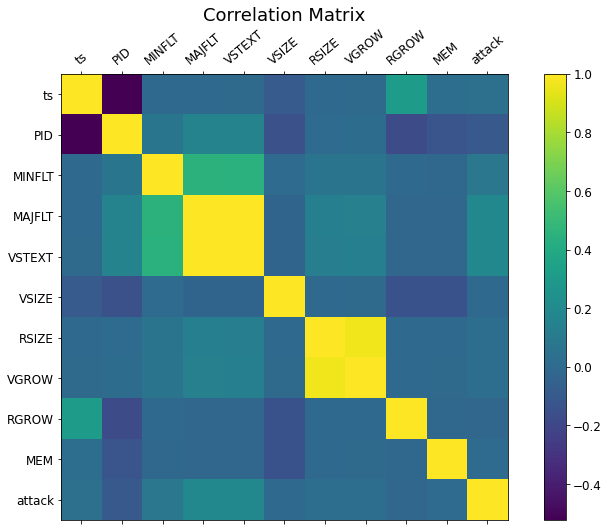

In [22]:
#Importing the required libraries to draw the correlation plot
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation
from pyspark.mllib.stat import Statistics
import matplotlib.pyplot as plt

#Declaring the output feature
vector_col = "corr_features"

#Using the vectorAssembler in the data frame
assembler = VectorAssembler(inputCols=[item[0] for item in memory_df.dtypes if not item[1].startswith('string')], 
                            outputCol=vector_col)

#Transforming the provided data set
myGraph_vector = assembler.transform(memory_df).select(vector_col)

#Drawing correlation matrix
matrix = Correlation.corr(myGraph_vector, vector_col).collect()[0][0]

#Converting it to the required format
corrmatrix = matrix.toArray().tolist()

#Creating a Data frame to plot the correlation value in heat map
df = spark.createDataFrame(corrmatrix,[item[0] for item in memory_df.dtypes if not item[1].startswith('string')]).toPandas()

#Figure size
f = plt.figure(figsize=(13, 8))

#generating heat map
plt.matshow(df, fignum=f.number)

#X axis lables
plt.xticks(range(df.shape[1]), df.columns, fontsize=12, rotation=40)

#Y axis lables
plt.yticks(range(df.shape[1]), df.columns, fontsize=12)

#declaring the colour bar
cb = plt.colorbar()

#Lable size
cb.ax.tick_params(labelsize=12)

#title for the image
plt.title('Correlation Matrix', fontsize=18)

+ From the above correlation matrix, it can be seen that

    + **TS and PID are negatively correlated**.
    
    + **VSTEXT and MAJFLT are positively correlated.**
    
    + **RSIZE and VGROW are positively correlated.**
    
    + **PID, MINFLT , RGROW, VSIZE, RSIZE and VSTEXT are have high correlation coeffecient** to the target variable(attack column) when compared to the rest of the columns. 

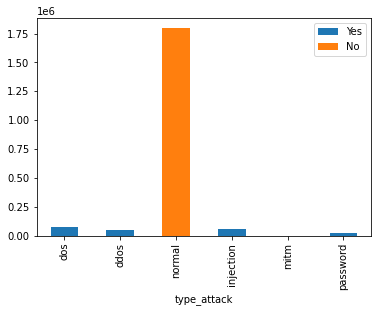

In [23]:
# Select example rows to display.
predicted_data = memory_df.select('type', 'attack')

#Converting 0 to No and 1 to YEs to plot a stacked bar graph
predicted_data = predicted_data.withColumn('attack', when(col('attack') == 0, "No").otherwise("Yes"))

#Cross tab to get the count
df = predicted_data.crosstab('type', 'attack').toPandas()

#setting the column "type attack" as index
df = df.set_index("type_attack")

#Generating the Graphs
axis = df[["Yes","No"]].plot(kind="bar", stacked=True)

#Display the results
fig = axis.get_figure()

+ From the above bar chart, it can be seen that the **type attack Normal** is way too more when compared to the other classes in the column. This clearly suggests that this column should not be considered when analysing the problem since there is class imbalance there might be over-fitting of the model.

+ Rest of the classes in the column are almost equally distributed but for mitm which can be clearly seen from the image above. 

Text(0.5, 1.0, 'Correlation Matrix')

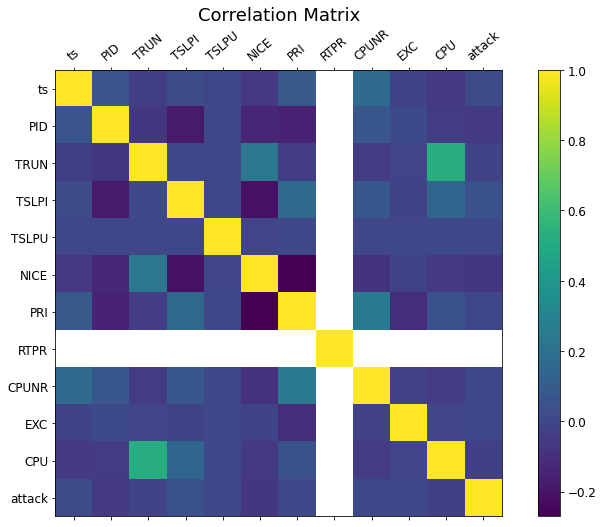

In [24]:
#Declaring the output feature
vector_col = "corr_features"

#Using the vectorAssembler in the data frame
assembler = VectorAssembler(inputCols=[item[0] for item in process_df.dtypes if not item[1].startswith('string')], 
                            outputCol=vector_col)

#Transforming the provided data set
myGraph_vector = assembler.transform(process_df).select(vector_col)

#Drawing correlation matrix
matrix = Correlation.corr(myGraph_vector, vector_col).collect()[0][0]

#Converting it to the required format
corrmatrix = matrix.toArray().tolist()

#Creating a Data frame to plot the correlation value in heat map
df = spark.createDataFrame(corrmatrix,[item[0] for item in process_df.dtypes if not item[1].startswith('string')]).toPandas()

#Figure size
f = plt.figure(figsize=(13, 8))

#generating heat map
plt.matshow(df, fignum=f.number)

#X axis lables
plt.xticks(range(df.shape[1]), df.columns, fontsize=12, rotation=40)

#Y axis lables
plt.yticks(range(df.shape[1]), df.columns, fontsize=12)

#declaring the colour bar
cb = plt.colorbar()

#Lable size
cb.ax.tick_params(labelsize=12)

#title for the image
plt.title('Correlation Matrix', fontsize=18)

+ From the above correlation matrix, it can be seen that

    + **TSLPI and PID are negatively correlated**.
    
    + **TRUN and CPU are positively correlated.** 
    
    + **NICE and TSLPI are negatively correlated**
    
    + **NICE AND PRI are negatively correlated**
    
    + **CPUNR and PRI are positively correlated**
    
    + **PID,TSLPI,PRI and CPU are have high correlation coeffecient** to the target variable(attack column) when compared to the rest of the columns. 

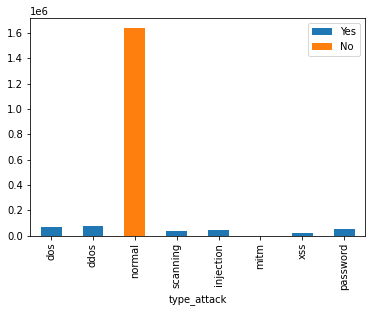

In [25]:
# Select example rows to display.
predicted_data = process_df.select('type', 'attack')

#Converting 0 to No and 1 to YEs to plot a stacked bar graph
predicted_data = predicted_data.withColumn('attack', when(col('attack') == 0, "No").otherwise("Yes"))

#Cross tab to get the count
df = predicted_data.crosstab('type', 'attack').toPandas()

#setting the column "type attack" as index
df = df.set_index("type_attack")

#Generating the Graphs
axis = df[["Yes","No"]].plot(kind="bar", stacked=True)

#Display the results
fig = axis.get_figure()

+ From the above bar chart, it can be seen that the **type attack Normal** is way too more when compared to the other classes in the column. This clearly suggests that this column should not be considered when analysing the problem since there is class imbalance there might be over-fitting of the model.

+ Rest of the classes in the column are almost equally distributed but for mitm which can be clearly seen from the image above. 

## 2. Feature extraction and ML training (55%)

#### 2.1 Preparing the training data and testing data (4%)


1. Randomly split the dataset into 80% training data and 20% testing data for each use case


In [26]:
#Splitting the data into testing and training set 80% into training and 20% for testing for process data frame
train_process, test_process = process_df.randomSplit([0.8, 0.2],123)

#Splitting the data into testing and training set 80% into training and 20% for testing for memory data frame
train_memory, test_memory = memory_df.randomSplit([0.8, 0.2],123)

In [27]:
#Getting the count of attacks and non-attacks in the process training set
process_attack_count = train_process.groupBy("attack").count()

#Getting the count of attacks and non-attacks in the memory training set
memory_attack_count = train_memory.groupBy("attack").count()

#displaying the count
print("Based on the column 'Attack', below are the number of attacks(1) and non-attacks(0) in the Process Training data frame: ")
process_attack_count.show()

#displaying the count
print("Based on the column 'Attack', below are the number of attacks(1) and non-attacks(0) in the Memory Training data frame: ")
memory_attack_count.show()


Based on the column 'Attack', below are the number of attacks(1) and non-attacks(0) in the Process Training data frame: 
+------+-------+
|attack|  count|
+------+-------+
|     1| 233285|
|     0|1308680|
+------+-------+

Based on the column 'Attack', below are the number of attacks(1) and non-attacks(0) in the Memory Training data frame: 
+------+-------+
|attack|  count|
+------+-------+
|     1| 164530|
|     0|1434891|
+------+-------+



In [28]:
#Since there is a class imbalance in the data set based on the target variable,
#in order to avoid the bias rebalancing the data set

#process training data rebalancing through under-sampling

#getting the records of 1's in the process training data
attack_process_df = train_process.filter(col("attack") == 1)

#getting the records of 0's in the process training data
non_attack_process_df = train_process.filter(col("attack") == 0)
#non_attack_count = process_attack_count.filter(col("attack") == 1).collect()[0][1]

#Calculating the 20% value of the attack class
attack_percentage = (attack_process_df.count()*0.2)/attack_process_df.count()

#Calculating the 40% value of the attack class
non_attack_percentage = (attack_process_df.count()*0.4)/non_attack_process_df.count()

#Sampling for attack class in the data frame created above
sampled_attack_df = attack_process_df.sample(False,attack_percentage)

#Sampling for non-attack class in the data frame created above
sampled_non_attack_df = non_attack_process_df.sample(False,non_attack_percentage)

#Merging both the data frame
rescaled_train_df_process = sampled_attack_df.unionAll(sampled_non_attack_df)

#caching the rebalanced train process data
rescaled_train_df_process.cache()
print("Process training data has been rescaled and cached")

#Displaying the count
print("After re-sampling, the number of records in the process training data set is : ", rescaled_train_df_process.count())



Process training data has been rescaled and cached
After re-sampling, the number of records in the process training data set is :  141043


In [29]:
#Since there is a class imbalance in the data set based on the target variable,
#in order to avoid the bias rebalancing the data set

#process training data rebalancing through under-sampling

#getting the records of 1's in the memory training data
attack_memory_df = train_memory.filter(col("attack") == 1)

#getting the records of 0's in the memory training data
non_attack_memory_df = train_memory.filter(col("attack") == 0)

#Calculating the 20% value of the attack class
attack_percentage = (attack_memory_df.count()*0.2)/attack_memory_df.count()

#Calculating the 40% value of the attack class
non_attack_percentage = (attack_memory_df.count()*0.4)/non_attack_memory_df.count()

#Sampling for attack class in the data frame created above
sampled_attack_df = attack_memory_df.sample(False,attack_percentage)

#Sampling for non-attack class in the data frame created above
sampled_non_attack_df = non_attack_memory_df.sample(False,non_attack_percentage)

#Merging both the data frame
rescaled_train_df_memory = sampled_attack_df.union(sampled_non_attack_df)

#caching the rebalanced train memory data
rescaled_train_df_memory.cache()
print("Memory training data has been rescaled and cached")

#Displaying the count
print("After re-sampling, the number of records in the memory training data set is : ",rescaled_train_df_memory.count())

Memory training data has been rescaled and cached
After re-sampling, the number of records in the memory training data set is :  98542


In [30]:
#Getting the count of attacks and non-attacks in the process training set
rescale_process_attack_count = rescaled_train_df_process.groupBy("attack").count()

#Getting the count of attacks and non-attacks in the memory training set
rescale_memory_attack_count = rescaled_train_df_memory.groupBy("attack").count()

#displaying the count
print("Based on the column 'Attack', below are the number of attacks(1) and non-attacks(0) in rescaled Process Training data frame: ")
rescale_process_attack_count.show()

#displaying the count
print("Based on the column 'Attack', below are the number of attacks(1) and non-attacks(0) in rescaled Memory Training data frame: ")
rescale_memory_attack_count.show()


Based on the column 'Attack', below are the number of attacks(1) and non-attacks(0) in rescaled Process Training data frame: 
+------+-----+
|attack|count|
+------+-----+
|     1|46896|
|     0|94147|
+------+-----+

Based on the column 'Attack', below are the number of attacks(1) and non-attacks(0) in rescaled Memory Training data frame: 
+------+-----+
|attack|count|
+------+-----+
|     1|32653|
|     0|65889|
+------+-----+



### 2.2 Preparing features, labels and models (16%)

### Based on data exploration from 1.3.3, which features would you select? Discuss the reason for selecting them and how you plan to further transform them.


+ **Columns For Memory Data Frame :** 

    + Below are the findings from the correlation Matrix

        + **PID** - Negatively correlated to attack column(target) to a considerable amount

        + **MINFLT** - Positively correlated to attack column(target) to a considerable amount

        + **RGROW** - Negatively correlated to attack column(target) to a considerable amount

        + **VSIZE** - Positively correlated to attack column(target) to a considerable amount

        + **VSTEXT** - VSTEXT and MAJFLT are highly correlated to each other and they contribute the same amount to the attack field. So choosing VSTEXT.

        + **RSIZE** - RSIZE and VGROW are highly correlated to each other and they contribute the same amount to the attack field. So choosing RSIZE.

        + Reason for ommiting **Type column is that, it is unbalanced class**. It might influence to overfit the model.
  
    + **Transformations on these columns :**
    
        + Since all the columns are of continuous type, standard scalar is done since there standard deviation is high and to nullify  the units of the column.
    
    
    
+ **Columns For Process Data Frame :**

    + Below are the findings from the correlation Matrix

        + **PID** - Negatively correlated to attack column(target) to a considerable amount

        + **PRI** - PRI and NICE are highly negative correlated. So choosing One amoung them, i.e PRI.

        + **TSLPI** - Negatively correlated to attack column(target) to a considerable amount
        
        + **Status** - Since the type string and the class is balanced, choosing the column
        
        + **State** - Since the type string and the class is balanced, choosing the column
        
        + **POLI** - Since the type string and the class is balanced, choosing the column

        + Reason for ommiting **RPTR is it has No correlation.**

        + Reason for ommiting **Type column is that, it is unbalanced class**. It might influence to overfit the model.

    + **Transformations on these columns :**
    
        + Since both categorical and numerical type columns are there, 
            
            + **For Numerical columns** : standard scalar is done since there standard deviation is high and to nullify  the units of the column.
            
            + **For Categorical columns** : String Index and One hot encoding is done since the cartegorical types are of Nominal and not Ordinal. 

In [31]:
#based on the above explanation, selecting the features for Memory data frame.
reqd_features_memory = rescaled_train_df_memory.select('PID','MINFLT','MAJFLT','RGROW','attack')
test_data_mem = test_memory.select('PID','MINFLT','MAJFLT','RGROW','attack')

### Create Transformers / Estimators for transforming / assembling the features you selected above in 2.2.1 and Prepare Estimators for Decision Tree and Gradient Boosted Tree model for each use case and include them into ML Pipelines for use case 1, 2



In [32]:
#importing the required packages for performing String Indexing, One Hot Encoding, Vector Assembler, Normalising, Pipe Line 
#Decision tree and Gradient Boosting Tree model.

from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import OneHotEncoder
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import Normalizer
from pyspark.ml import Pipeline
from pyspark.ml.feature import MinMaxScaler
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.feature import StandardScaler
from pyspark.ml.classification import GBTClassifier

In [33]:
#Tried with all columns initially. Got to know that the "Type" column is influencing the attack column to 
#a greater extent. So inorder to avoid overfitting of the model, removed the type column from the regression analysis.

# memory_index_input = ['type']
# memory_index_output = [f'{item}_index' for item in memory_index_input]

# #encode_input = index_output
# memory_encode_output = [f'{item}_vec' for item in memory_index_input]


# vec_inputs.extend(memory_encode_output)

# #vec_inputs = ['PID','MINFLT','MAJFLT','RGROW','VSTEXT','VSIZE','RSIZE','VGROW','MEM']

# #Define the Standard Scaler here
# #Step 2 : Feature Engineering
#memory_indexer = StringIndexer(inputCols=memory_index_input,outputCols=memory_index_output,handleInvalid='keep')
#memory_encoder = OneHotEncoder(inputCols=memory_index_output,outputCols=memory_encode_output)

#Input columns for Vector assembler
vec_inputs = ['PID','MINFLT','RGROW','VSTEXT','VSIZE','RSIZE']#,'VGROW','MEM']#,'Status_vec','State_vec']

#For pipeline
#Vector Assembler
memory_assembler = VectorAssembler(inputCols=vec_inputs,outputCol='features')

#Standard Scaler
memory_scaler = StandardScaler(inputCol='features', outputCol='scaledFeatures')

#Decision tree model
memory_dt = DecisionTreeClassifier(labelCol='attack', featuresCol = 'scaledFeatures',maxDepth = 5)

#Normalizer 
memory_norm = Normalizer(inputCol = 'scaledFeatures',outputCol = 'norm_features',p=1.0)

#Gradient Boosting Tree model
memory_gbt = GBTClassifier(featuresCol = 'norm_features', labelCol = 'attack', maxIter = 8)

#pipeline = Pipeline().setStages(scaler + [encoder,assembler,dt])
#pipeline_dt_memory =  Pipeline(stages=[memory_indexer,memory_encoder,memory_assembler,memory_scaler,memory_dt])
#pipeline_gbt_memory = Pipeline(stages=[memory_indexer,memory_encoder,memory_assembler,memory_scaler,memory_norm,memory_gbt])

#Creating a pipeline. 
#Decision Tree Pipeline
pipeline_dt_memory =  Pipeline(stages=[memory_assembler,memory_scaler,memory_dt])

#Gradient Boosting Tree Pipeline
pipeline_gbt_memory = Pipeline(stages=[memory_assembler,memory_scaler,memory_norm,memory_gbt])

In [34]:
#Input and ouput columns for String indexer
index_input = ['POLI','Status','State']
index_output = [f'{item}_index' for item in index_input]

#Input and ouput columns for Onehot encoding
#encode_input = index_output
encode_output = [f'{item}_vec' for item in index_input]

#Input column for Vector Assembler
vec_input = ['PID','TSLPI','PRI','CPU']#,'Status_vec','State_vec']
vec_input.extend(encode_output)

#For pipeline
#String indexing
process_indexer = StringIndexer(inputCols=index_input,outputCols=index_output,handleInvalid='keep')

#One Hot encoding
process_encoder = OneHotEncoder(inputCols=index_output,outputCols=encode_output)

#Vector Assembler
process_assembler = VectorAssembler(inputCols=vec_input,outputCol='features',handleInvalid='keep')

#Standar scaler
process_scaler = StandardScaler(inputCol='features', outputCol='scaledFeatures')

#Decision Tree Model
process_dt = DecisionTreeClassifier(labelCol='attack', featuresCol = 'scaledFeatures',maxDepth = 4)

#Normalizer
process_norm = Normalizer(inputCol = 'scaledFeatures',outputCol = 'norm_features',p=1.0)

#Gradient Boosting Tree Model
process_gbt = GBTClassifier(featuresCol = 'norm_features', labelCol = 'attack', maxIter = 8)

#Creating a pipeline.
#Pipeline for decision tree
pipeline_dt_process =  Pipeline(stages=[process_indexer,process_encoder,process_assembler,process_scaler,process_dt])

#Pipeline for Gradient Boosting tree
pipeline_gbt_process = Pipeline(stages=[process_indexer,process_encoder,process_assembler,process_scaler,process_norm,process_gbt])

### For each use case, use the corresponding ML Pipeline from previous step to train the models on the rebalanced training data from 2.1.2

#### Memory Data Frame

##### Decision Tree Pipeline


In [35]:
# Train model.  This also runs the indexers.
model_memory_dt = pipeline_dt_memory.fit(rescaled_train_df_memory)

# Make predictions.
predictions_memory_dt =  model_memory_dt.transform(test_memory)

# Select example rows to display.
predictions_memory_dt.select("scaledFeatures", "attack", "prediction").show(5)

+--------------------+------+----------+
|      scaledFeatures|attack|prediction|
+--------------------+------+----------+
|[0.30954225498795...|     0|       0.0|
|[0.71825824215652...|     0|       0.0|
|[0.54674349754114...|     0|       0.0|
|[0.54159161534994...|     0|       0.0|
|[0.60298487812841...|     0|       0.0|
+--------------------+------+----------+
only showing top 5 rows



##### Gradient Boosting Tree Pipeline

In [36]:
# Train model.  This also runs the indexers.
model_memory_gbt = pipeline_gbt_memory.fit(rescaled_train_df_memory)

# Make predictions.
predictions_memory_gbt =  model_memory_gbt.transform(test_memory)

# Select example rows to display.
predictions_memory_gbt.select("norm_features", "attack", "prediction").show(5)

+--------------------+------+----------+
|       norm_features|attack|prediction|
+--------------------+------+----------+
|[0.12347727435408...|     0|       1.0|
|[0.01838101878959...|     0|       0.0|
|[0.03601133062369...|     0|       0.0|
|[0.03589932008011...|     0|       0.0|
|[0.04877532501291...|     0|       0.0|
+--------------------+------+----------+
only showing top 5 rows



#### Process Data Frame

##### Decision Tree Pipeline

In [37]:
# Train model.  This also runs the indexers.
model_process_dt = pipeline_dt_process.fit(rescaled_train_df_process)

# Make predictions.
predictions_process_dt =  model_process_dt.transform(test_process)

# Select example rows to display.
predictions_process_dt.select("scaledFeatures", "attack", "prediction").show(5)

+--------------------+------+----------+
|      scaledFeatures|attack|prediction|
+--------------------+------+----------+
|(19,[0,1,2,3,4,10...|     0|       1.0|
|(19,[0,1,2,3,4,10...|     0|       1.0|
|(19,[0,1,2,4,10,1...|     0|       1.0|
|(19,[0,1,2,4,10,1...|     0|       1.0|
|(19,[0,1,2,4,10,1...|     0|       1.0|
+--------------------+------+----------+
only showing top 5 rows



##### Gradient Boosting Tree Pipeline

In [38]:
# Train model.  This also runs the indexers.
model_process_gbt = pipeline_gbt_process.fit(rescaled_train_df_process)

# Make predictions.
predictions_process_gbt =  model_process_gbt.transform(test_process)

# Select example rows to display.
predictions_process_gbt.select("norm_features", "attack", "prediction").show(5)

+--------------------+------+----------+
|       norm_features|attack|prediction|
+--------------------+------+----------+
|(19,[0,1,2,3,4,10...|     0|       1.0|
|(19,[0,1,2,3,4,10...|     0|       0.0|
|(19,[0,1,2,4,10,1...|     0|       0.0|
|(19,[0,1,2,4,10,1...|     0|       0.0|
|(19,[0,1,2,4,10,1...|     0|       0.0|
+--------------------+------+----------+
only showing top 5 rows



#### For each use case, test the models on the testing data from 2.1.1 and display the count of each combination of attack label and prediction label in formats as below

In [39]:
print("The confusion matrix format for the Process Data Frame for the model Decision Tree is as below : ")
predictions_process_dt.groupBy("attack", "prediction").count().show()

The confusion matrix format for the Process Data Frame for the model Decision Tree is as below : 
+------+----------+------+
|attack|prediction| count|
+------+----------+------+
|     1|       0.0| 34160|
|     0|       0.0|290712|
|     1|       1.0| 23919|
|     0|       1.0| 37212|
+------+----------+------+



In [40]:
print("The confusion matrix format for the Process Data Frame for the model Gradient Boosted Tree is as below : ")
predictions_process_gbt.groupBy(["attack", "prediction"]).count().show()

The confusion matrix format for the Process Data Frame for the model Gradient Boosted Tree is as below : 
+------+----------+------+
|attack|prediction| count|
+------+----------+------+
|     1|       0.0| 31401|
|     0|       0.0|289919|
|     1|       1.0| 26678|
|     0|       1.0| 38005|
+------+----------+------+



In [41]:
print("The confusion matrix format for the Memory Data Frame for the Decision Tree is as below : ")
predictions_memory_dt.groupBy(["attack", "prediction"]).count().show()

The confusion matrix format for the Memory Data Frame for the Decision Tree is as below : 
+------+----------+------+
|attack|prediction| count|
+------+----------+------+
|     1|       0.0| 23116|
|     0|       0.0|313314|
|     1|       1.0| 17977|
|     0|       1.0| 46172|
+------+----------+------+



In [42]:
print("The confusion matrix format for the Memory Data Frame for the model Gradient Boosted Tree is as below : ")
predictions_memory_gbt.groupBy(["attack", "prediction"]).count().show()

The confusion matrix format for the Memory Data Frame for the model Gradient Boosted Tree is as below : 
+------+----------+------+
|attack|prediction| count|
+------+----------+------+
|     1|       0.0| 24864|
|     0|       0.0|333147|
|     1|       1.0| 16229|
|     0|       1.0| 26339|
+------+----------+------+



### Compute the AUC, accuracy, recall and precision for the attack label from each model testing result using pyspark MLlib / ML APIs. Discuss which metric is more proper for measuring the model performance on identifying attacks.


In [43]:
'''
compute_metrics is a user defined function that takes in  the prediction data frame.
COmputes various metrics like Accuracy, Recall, Precision, F1 score, AUC and FPR and returns the same as list.
'''


# Use BinaryClassificationEvaluator to evaluate a model
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction")
#.withColumnRenamed("attack", "label")
def compute_metrics(predictions):
    # Evaluate model
    evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction")
    
    #Renaming the column so that evaluator evaluates the Model for AUC.
    predictions = predictions.withColumnRenamed("attack", "label")
    
    #Getting the True Negative count
    TN = predictions.filter('prediction = 0.0 AND label = 0').count()
    
    #Getting the True Positive count
    TP = predictions.filter('prediction = 1.0 AND label = 1').count()
    
    #Getting the False Negative count
    FN = predictions.filter('prediction = 0.0 AND label = 1').count()
    
    #Getting the False Positive count
    FP = predictions.filter('prediction = 1.0 AND label = 0').count()
    
    #Getting the AUC value
    auc = evaluator.evaluate(predictions)

    # calculate metrics from the confusion matrix
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    f1 = ((recall*precision)/(recall+precision))*2
    FPR = FP/(TN+FP)
    
    #Returning the values
    return auc,accuracy,recall,precision,FPR

In [44]:
#Function call to get the metrics for decision tree model for Memory data frame
memory_dt_metrics = compute_metrics(predictions_memory_dt)

#Function call to get the metrics for gradiant boosting tree model for Memory data frame
memory_gbt_metrics = compute_metrics(predictions_memory_gbt)

#Function call to get the metrics for decision tree model for Process data frame
process_dt_metrics = compute_metrics(predictions_process_dt)

#Function call to get the metrics for gradiant boosting tree model for Process data frame
process_gbt_metrics = compute_metrics(predictions_process_gbt)

In [45]:
print("For the Memory Data Frame, the metrics are as below : ")

print("\nDecision Tree Metrics : ")
print("\nAUC : ",memory_dt_metrics[0])
print("Accuracy : ",memory_dt_metrics[1])
print("Recall : ",memory_dt_metrics[2])
print("Precision : ",memory_dt_metrics[3])

print("\nGradient Boosted Tree Metrics : ")
print("\nAUC : ",memory_gbt_metrics[0])
print("Accuracy : ",memory_gbt_metrics[1])
print("Recall : ",memory_gbt_metrics[2])
print("Precision : ",memory_gbt_metrics[3])

print("\n\nFor the Process Data Frame, the metrics are as below : ")

print("\nDecision Tree Metrics : ")
print("\nAUC : ",process_dt_metrics[0])
print("Accuracy : ",process_dt_metrics[1])
print("Recall : ",process_dt_metrics[2])
print("Precision : ",process_dt_metrics[3])

print("\nGradient Boosted Tree Metrics : ")
print("\nAUC : ",process_gbt_metrics[0])
print("Accuracy : ",process_gbt_metrics[1])
print("Recall : ",process_gbt_metrics[2])
print("Precision : ",process_gbt_metrics[3])

For the Memory Data Frame, the metrics are as below : 

Decision Tree Metrics : 

AUC :  0.4929945120397899
Accuracy :  0.8270303735343091
Recall :  0.43747110213418344
Precision :  0.28023819545121514

Gradient Boosted Tree Metrics : 

AUC :  0.8150223436654845
Accuracy :  0.8721775230354063
Recall :  0.39493344365220356
Precision :  0.38124882540875776


For the Process Data Frame, the metrics are as below : 

Decision Tree Metrics : 

AUC :  0.4014684825046777
Accuracy :  0.8150998826433992
Recall :  0.41183560323008317
Precision :  0.39127447612504296

Gradient Boosted Tree Metrics : 

AUC :  0.8052752799754095
Accuracy :  0.8201931073074562
Recall :  0.45933986466709137
Precision :  0.41244221820261895


+ From the Above results, it can be seen that the accurary(Out of all the classes, how much were predicted correctly) metric for all four pipeline models are high. 

+ Although the accuracy is high, we should take in AUC-ROC curve into consideration since AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s.

+ **To identify attacks as attacks**, we should consider the metric **"RECALL"** because, recall provides information about out of all the positive classes, how much we predicted correctly. 

### Display the top-5 most important features in each model. Discuss which pipeline model is better, and whether the feature “ts” should be included in the model . And visualise the ROC curve for the better model you selected for each use case

In [46]:
'''
ExtractFeatureImp is an user defined function that takes in featureImp, dataset and featuresCol as input 
to compute the the significance of each column be it continous or categorical and return its corresponding significance 
as output. 
'''

import pandas as pd

#User defined function
def ExtractFeatureImp(featureImp, dataset, featuresCol):
    list_extract = []
    for i in dataset.schema[featuresCol].metadata["ml_attr"]["attrs"]:
        list_extract = list_extract + dataset.schema[featuresCol].metadata["ml_attr"]["attrs"][i]
    varlist = pd.DataFrame(list_extract)
    varlist['score'] = varlist['idx'].apply(lambda x: featureImp[x])
    return(varlist.sort_values('score', ascending = False))

In [47]:
print("The Top 5 features for the Memory Data Frame for the model Decision Tree are as below : \n")
ExtractFeatureImp(model_memory_dt.stages[-1].featureImportances,predictions_memory_dt, "features").head(5)

The Top 5 features for the Memory Data Frame for the model Decision Tree are as below : 



,idx,name,score
0,0,PID,0.269121
1,1,MINFLT,0.261071
4,4,VSIZE,0.157110
3,3,VSTEXT,0.110367
2,2,RGROW,0.101910


In [48]:
print("The Top 5 features for for the Memory Data Frame for the model Gradient Boosted Tree are as below : \n")
ExtractFeatureImp(model_memory_gbt.stages[-1].featureImportances,predictions_memory_gbt, "features").head(5)

The Top 5 features for for the Memory Data Frame for the model Gradient Boosted Tree are as below : 



,idx,name,score
0,0,PID,0.277536
3,3,VSTEXT,0.245269
5,5,RSIZE,0.194639
4,4,VSIZE,0.136902
1,1,MINFLT,0.131419


In [49]:
print("The Top 5 features for the Process Data Frame for the model Decision Tree are as below : ")
ExtractFeatureImp(model_process_dt.stages[-1].featureImportances,predictions_process_dt, "features").head(5)

The Top 5 features for the Process Data Frame for the model Decision Tree are as below : 


,idx,name,score
7,7,Status_vec_-,0.477646
0,0,PID,0.443673
5,5,POLI_vec_0,0.073170
13,13,State_vec_I,0.005511
11,11,Status_vec_NS,0.000000


In [50]:
print("The Top 5 features format for the Process Data Frame for the model Gradient Boosted Tree are as below : ")
ExtractFeatureImp(model_process_gbt.stages[-1].featureImportances,predictions_process_gbt, "features").head(5)

The Top 5 features format for the Process Data Frame for the model Gradient Boosted Tree are as below : 


,idx,name,score
0,0,PID,0.223855
7,7,Status_vec_-,0.170028
8,8,Status_vec_0,0.151116
2,2,PRI,0.106803
4,4,POLI_vec_norm,0.100502


+ For both the data frames (i.e) the process and the memory data frame, model_process_gbt and model_memory_gbt pipleline model is much efficient. It can be seen that for the **Gradiant Boosting tree Model the AUC-ROC scores for these pipeline model is more than 80%**. Hence it is the **efficient model in predicting the attacks and Non-attacks more effectively.** 

+ Better Model For Memory Data Frame : **Gradient Boosting Tree**

+ Better Model For Process Data Frame : **Gradient Boosting Tree**

+ The **column "TS" should not be included** since it is the timestamp of the activity. It **does not play any significant role in predicting the target variable**. 


#### AUC-ROC CURVE

In [51]:
from pyspark.mllib.evaluation import BinaryClassificationMetrics

#Curve Metrics is a user defined call to generate the ROC curve.
#It inherits from the BinaryClassificationMetrics
class CurveMetrics(BinaryClassificationMetrics):
    def __init__(self, *args):
        super(CurveMetrics, self).__init__(*args)

    def _to_list(self, rdd):
        points = []
        for row in rdd.collect():
            points += [(float(row._1()), float(row._2()))]
        return points

    def get_curve(self, method):
        rdd = getattr(self._java_model, method)().toJavaRDD()
        return self._to_list(rdd)

In [52]:
'''
roc_curve_plot is a user defined function that takes in prediction from the pipeline model as input. 
It then renames the attack column to label and then calls the class defined above. 
Based on the values got, ROC curve is drawn.
'''

#User defined function
def roc_curve_plot(predictions):
    
    #Evaluator to evaluate the ROC curve
    evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction")
    
    #Renaming the column
    predictions = predictions.withColumnRenamed("attack", "label")
    
    #Printing the AUC-ROC curve value
    print("Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))
    
    #Converting the df to rdd to pass in to the class for desired outputs
    preds = predictions.select('label','probability').rdd.map(lambda row: (float(row['probability'][1]), float(row['label'])))

    # Returns as a list (false positive rate, true positive rate)
    points = CurveMetrics(preds).get_curve('roc')
    
    #Plotting the AUC-ROC graph.
    plt.figure()
    x_val = [x[0] for x in points]
    y_val = [x[1] for x in points]
    plt.ylabel('TPR')
    plt.xlabel('FPR')
    plt.title('ROC Curve')
    plt.plot(x_val, y_val)

##### AUC-ROC Curve for Memory Data set Gradient Boosting Tree

Area Under ROC: 0.8150223436654845


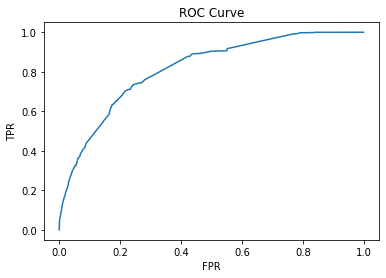

In [53]:
#Calling the user defined function to plot the AUC-ROC curve for Memory data frame
#Gradient Boosting tree model since the AUC-ROC curve metric is better when compared to the Decision tree model
roc_curve_plot(predictions_memory_gbt)

##### AUC-ROC Curve for Process Data set Gradient Boosting Tree

Area Under ROC: 0.8052752799754097


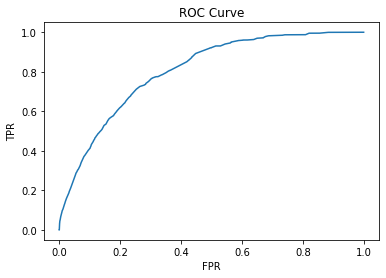

In [54]:
#Calling the user defined function to plot the AUC-ROC curve for Process data frame
#Gradient Boosting tree model since the AUC-ROC curve metric is better when compared to the Decision tree model
roc_curve_plot(predictions_process_gbt)

### Using the pipeline model you selected in the previous step, re-train the pipeline model using a bigger set of rebalanced training data, with attack events and non-attack events being 1:2 ratio, while using all attack events data from the full data for both use cases. Then persist the better models for each use case.

#### Process Data Frame Train data Rescale

In [55]:
#getting the records of 1's in the process training data
attack_process_df_part2 = train_process.filter(col("attack") == 1)

#getting the records of 0's in the process training data
non_attack_process_df_part2 = train_process.filter(col("attack") == 0)
#non_attack_count = process_attack_count.filter(col("attack") == 1).collect()[0][1]

#Calculating the 40% value of the attack class
non_attack_percentage_part2 = (attack_process_df_part2.count()*2)/non_attack_process_df.count()


#Sampling for non-attack class in the data frame created above
sampled_non_attack_df_part2 = non_attack_process_df_part2.sample(False,non_attack_percentage_part2)

#Merging both the data frame
rescaled_train_df_process_part2 = attack_process_df_part2.unionAll(sampled_non_attack_df_part2)

#caching the rebalanced train process data
rescaled_train_df_process_part2.cache()
print("Process training data has been rescaled and cached")

#Displaying the count
print("After re-sampling, the number of records in the process training data set is : ", rescaled_train_df_process_part2.count())

#Getting the count of attacks and non-attacks in the process training set
rescale_process_attack_count_part2 = rescaled_train_df_process_part2.groupBy("attack").count()

#displaying the count
print("Based on the column 'Attack', below are the number of attacks(1) and non-attacks(0) in rescaled Process Training data frame: ")
rescale_process_attack_count_part2.show()

Process training data has been rescaled and cached
After re-sampling, the number of records in the process training data set is :  698828
Based on the column 'Attack', below are the number of attacks(1) and non-attacks(0) in rescaled Process Training data frame: 
+------+------+
|attack| count|
+------+------+
|     1|233285|
|     0|465543|
+------+------+



#### Memory Data Frame Train data Rescale

In [56]:
#getting the records of 1's in the memory training data
attack_memory_df_part2 = train_memory.filter(col("attack") == 1)

#getting the records of 0's in the memory training data
non_attack_memory_df_part2 = train_memory.filter(col("attack") == 0)

#Calculating the 40% value of the attack class
non_attack_percentage_part2 = (attack_memory_df_part2.count()*2)/non_attack_memory_df_part2.count()

#Sampling for non-attack class in the data frame created above
sampled_non_attack_df_part2 = non_attack_memory_df_part2.sample(False,non_attack_percentage_part2)

#Merging both the data frame
rescaled_train_df_memory_part2 = attack_memory_df_part2.union(sampled_non_attack_df_part2)

#caching the rebalanced train memory data
rescaled_train_df_memory_part2.cache()
print("Memory training data has been rescaled and cached")

#Displaying the count
print("After re-sampling, the number of records in the memory training data set is : ",rescaled_train_df_memory_part2.count())

#Getting the count of attacks and non-attacks in the process training set
rescale_memory_attack_count_part2 = rescaled_train_df_memory_part2.groupBy("attack").count()

#displaying the count
print("Based on the column 'Attack', below are the number of attacks(1) and non-attacks(0) in rescaled Process Training data frame: ")
rescale_memory_attack_count_part2.show()

Memory training data has been rescaled and cached
After re-sampling, the number of records in the memory training data set is :  492334
Based on the column 'Attack', below are the number of attacks(1) and non-attacks(0) in rescaled Process Training data frame: 
+------+------+
|attack| count|
+------+------+
|     1|164530|
|     0|327804|
+------+------+



#### Pipeline Decision Tree Memory Data Frame 

In [57]:
# Train model.  This also runs the indexers.
model_memory_dt_part2 = pipeline_dt_memory.fit(rescaled_train_df_memory_part2)

# Make predictions.
predictions_memory_dt_part2 =  model_memory_dt_part2.transform(test_memory)

# Select example rows to display.
predictions_memory_dt_part2.select("scaledFeatures", "attack", "prediction").show(5)

+--------------------+------+----------+
|      scaledFeatures|attack|prediction|
+--------------------+------+----------+
|[0.31137553870896...|     0|       0.0|
|[0.72251217234410...|     0|       0.0|
|[0.54998162072936...|     0|       0.0|
|[0.54479922618774...|     0|       0.0|
|[0.60655609447537...|     0|       0.0|
+--------------------+------+----------+
only showing top 5 rows



#### Pipeline Gradient Boosting Tree Memory Data Frame 

In [58]:
# Train model.  This also runs the indexers.
model_memory_gbt_part2 = pipeline_gbt_memory.fit(rescaled_train_df_memory_part2)

# Make predictions.
predictions_memory_gbt_part2 =  model_memory_gbt_part2.transform(test_memory)

# Select example rows to display.
predictions_memory_gbt_part2.select("scaledFeatures", "attack", "prediction").show(5)

+--------------------+------+----------+
|      scaledFeatures|attack|prediction|
+--------------------+------+----------+
|[0.31137553870896...|     0|       0.0|
|[0.72251217234410...|     0|       0.0|
|[0.54998162072936...|     0|       0.0|
|[0.54479922618774...|     0|       0.0|
|[0.60655609447537...|     0|       0.0|
+--------------------+------+----------+
only showing top 5 rows



#### Pipeline Decision Tree Process Data Frame 

In [59]:
# Train model.  This also runs the indexers.
model_process_dt_part2 = pipeline_dt_process.fit(rescaled_train_df_process_part2)

# Make predictions.
predictions_process_dt_part2 =  model_process_dt_part2.transform(test_process)

# Select example rows to display.
predictions_process_dt_part2.select("scaledFeatures", "attack", "prediction").show(5)

+--------------------+------+----------+
|      scaledFeatures|attack|prediction|
+--------------------+------+----------+
|(20,[0,1,2,3,4,10...|     0|       1.0|
|(20,[0,1,2,3,4,10...|     0|       1.0|
|(20,[0,1,2,4,10,1...|     0|       1.0|
|(20,[0,1,2,4,10,1...|     0|       1.0|
|(20,[0,1,2,4,10,1...|     0|       1.0|
+--------------------+------+----------+
only showing top 5 rows



#### Pipeline Gradient Boost Tree Process Data Frame 

In [60]:
# Train model.  This also runs the indexers.
model_process_gbt_part2 = pipeline_gbt_process.fit(rescaled_train_df_process_part2)

# Make predictions.
predictions_process_gbt_part2 =  model_process_gbt_part2.transform(test_process)

# Select example rows to display.
predictions_process_gbt_part2.select("scaledFeatures", "attack", "prediction").show(5)

+--------------------+------+----------+
|      scaledFeatures|attack|prediction|
+--------------------+------+----------+
|(20,[0,1,2,3,4,10...|     0|       1.0|
|(20,[0,1,2,3,4,10...|     0|       0.0|
|(20,[0,1,2,4,10,1...|     0|       0.0|
|(20,[0,1,2,4,10,1...|     0|       0.0|
|(20,[0,1,2,4,10,1...|     0|       0.0|
+--------------------+------+----------+
only showing top 5 rows



#### Metric for rescaled test-data

In [61]:
#Function call to get the metrics for decision tree model for Memory data frame
memory_dt_metrics_part2 = compute_metrics(predictions_memory_dt_part2)

#Function call to get the metrics for Gradient Boosting tree model for Memory data frame
memory_gbt_metrics_part2 = compute_metrics(predictions_memory_gbt_part2)

#Function call to get the metrics for decision tree model for Process data frame
process_dt_metrics_part2 = compute_metrics(predictions_process_dt_part2)

#Function call to get the metrics for Gradient Boosting tree model for Process data frame
process_gbt_metrics_part2 = compute_metrics(predictions_process_gbt_part2)

In [62]:
print("For the Memory Data Frame, the metrics are as below : ")

print("\nDecision Tree Metrics : ")
print("\nAUC : ",memory_dt_metrics_part2[0])
print("Accuracy : ",memory_dt_metrics_part2[1])
print("Recall : ",memory_dt_metrics_part2[2])
print("Precision : ",memory_dt_metrics_part2[3])

print("\nGradient Boosted Tree Metrics : ")
print("\nAUC : ",memory_gbt_metrics_part2[0])
print("Accuracy : ",memory_gbt_metrics_part2[1])
print("Recall : ",memory_gbt_metrics_part2[2])
print("Precision : ",memory_gbt_metrics_part2[3])

print("\n\nFor the Process Data Frame, the metrics are as below : ")

print("\nDecision Tree Metrics : ")
print("\nAUC : ",process_dt_metrics_part2[0])
print("Accuracy : ",process_dt_metrics_part2[1])
print("Recall : ",process_dt_metrics_part2[2])
print("Precision : ",process_dt_metrics_part2[3])

print("\nGradient Boosted Tree Metrics : ")
print("\nAUC : ",process_gbt_metrics_part2[0])
print("Accuracy : ",process_gbt_metrics_part2[1])
print("Recall : ",process_gbt_metrics_part2[2])
print("Precision : ",process_gbt_metrics_part2[3])

For the Memory Data Frame, the metrics are as below : 

Decision Tree Metrics : 

AUC :  0.6128727498786041
Accuracy :  0.8357277840326128
Recall :  0.3783856131214562
Precision :  0.2786109767241843

Gradient Boosted Tree Metrics : 

AUC :  0.8039065619941312
Accuracy :  0.8630707051542892
Recall :  0.4388581996933784
Precision :  0.36193954963272185


For the Process Data Frame, the metrics are as below : 

Decision Tree Metrics : 

AUC :  0.6612742039691005
Accuracy :  0.8127372067056474
Recall :  0.42760722464229756
Precision :  0.38880626223091974

Gradient Boosted Tree Metrics : 

AUC :  0.7973967580259433
Accuracy :  0.8228588896977485
Recall :  0.43656054684137124
Precision :  0.41560123262522947


+ When resampled the training data set also as per 2.3.5 requirements, it can be seen that for both the data frames (i.e) the process and the memory data frame, model_process_gbt and model_memory_gbt pipleline model is much efficient. It can be seen that for the **Gradiant Boosting tree Model the AUC-ROC scores for these pipeline model is more than 80%**. Hence it is the **efficient model in predicting the attacks and Non-attacks more effectively**.

+ Better Model For Memory Data Frame : Gradient Boosting Tree

+ Better Model For Process Data Frame : Gradient Boosting Tree

## 3. Knowledge sharing (10%)

### 3.1 How many jobs are observed when training the KMeans clustering model following the code below? Provide a screenshot from Spark UI for running a simple KMeans model training. (0.5%)

In [63]:
from pyspark.ml.clustering import KMeans

iris_df = spark.createDataFrame([
(4.7, 3.2, 1.3, 0.2),
(4.9, 3.1, 1.5, 0.1),
(5.4, 3.9, 1.3, 0.4),
(5.0, 3.4, 1.6, 0.4),
(5.1, 3.8, 1.6, 0.2),
(4.9, 2.4, 3.3, 1.0),
(6.6, 2.9, 4.6, 1.3),
(5.6, 3.0, 4.5, 1.5),
(5.7, 2.6, 3.5, 1.0),
(5.8, 2.6, 4.0, 1.2),
(5.8, 2.8, 5.1, 2.4),
(6.2, 2.8, 4.8, 1.8),
(6.0, 3.0, 4.8, 1.8),
(6.7, 3.1, 5.6, 2.4),
(6.7, 3.0, 5.2, 2.3),
(6.2, 3.4, 5.4, 2.3)],
['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
assembler = VectorAssembler(
inputCols=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
outputCol='features')
kmeans = KMeans(k=3).fit(assembler.transform(iris_df))


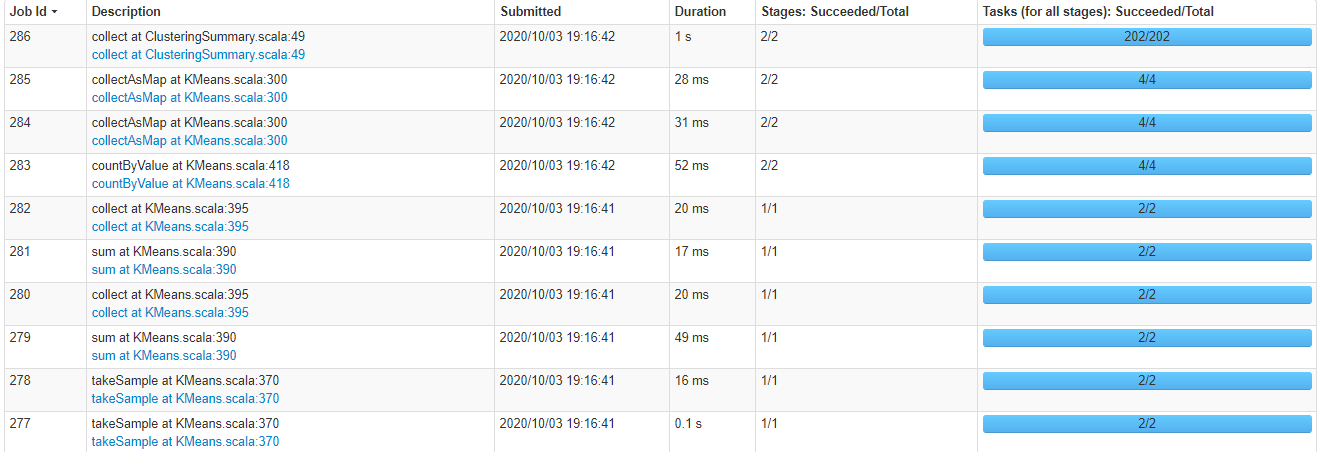

There are totally **10 Jobs observed when training the KMeans clustering model** from the above code. JOB IDs from 277 to 286 in the attached screen shot were used used for the KMeans clustering model.

### 3.2 Combining the KMeans algorithm from the lecture, explain what each job in Spark UI represents (9.5%)


+ K-means is an **iterative algorithm**. During the clustering process, **for each iteration the points are assigned to it's the nearest centroid** based of distance factor-like Euclidean distance, Manhattan distance etc. Then **centroids are updated based on the assigned points after each iteration.** Until a **certain quality metric is satisfied, this process is repeated**. Initial centroids are computed using one of the numbers of possible methods including random centroids and K-means.

+ From the above-attached Image, it can be seen that **there are 10 Jobs.** 

+ **Two processors** are working on the KMeans algorithm. **In each processor, clustering is done. This is Data Parallelism**. Also in **data parallelism only SUM and COUNT will take place since each processor will be working on all three clusters**. In result parallelism sum and count won't be there since each processor will work in each cluster. 

    + **277,278  - takeSample**
    
        +  It starts with K(given) randomly selected points or the mean of the data from the dataset as centre points
    
    + **279,281  - sum**

        + Sums up the values of data points for each cluster in the processor 

    + **280,282  - collect**
    
        + Counts the number of values/data points for each cluster in the processor.
    
    + **284,285  - collectAsMap**

        + The data is fetched to the driver and broadcasted to be used in the next iteration.

    + **283  - countBy Value**
    
        + Based on the Sum value after each iteration aggregation of the sum Value is performed through which new centroids are computed.

    + **286  - collect at ClusteringSummary**
    
        + Union of the clusters from each processor is done. Cluster 1 from processor 1 will be unioned with Cluster 1 from processor 2 and likewise. Cluster's summary is collected and stored in the variable. 

### REFERENCES:

1. Jun Wan [Feb 10], Oversampling and Undersampling with PySpark , 
https://medium.com/@junwan01/oversampling-and-undersampling-with-pyspark-5dbc25cdf253

2. jrjc, [Apr 3 '15], Plot correlation matrix using pandas,
https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas

3. Timothy Lin, [June 19, 2018] , Feature Selection Using Feature Importance Score - Creating a PySpark Estimator,
https://www.timlrx.com/2018/06/19/feature-selection-using-feature-importance-score-creating-a-pyspark-estimator/

4. Alex Ross, [Aug 3 '19] , PySpark: Get Threshold (cuttoff) values for each point in ROC curve,
https://stackoverflow.com/questions/54425084/pyspark-get-threshold-cuttoff-values-for-each-point-in-roc-curve

5. Lecture materials from week 5,6,7 and Lab materials from week 5,6 and 7 provided by FIT5202.

6. Alper t. Turker,[Sep 15 '17], when running spark mllib kmeans, What is the role of each stage on website?
https://stackoverflow.com/questions/46236955/when-running-spark-mllib-kmeans-what-is-the-role-of-each-stage-on-website

7. Clare S. Y. Huang [01 Aug 2020], Custom Transformer that can be fitted into Pipeline
https://csyhuang.github.io/2020/08/01/custom-transformer/